# Ch2. Time series graphics

## Sec. 2.1 `ts` object

replace `ts()` function in R as `date_range()` in `pandas`

In [1]:
import pandas as pd
import datetime
from math import pi
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'

import seaborn as sns
import statsmodels.api as sm

from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
idx = pd.date_range('2012', periods=5, freq='Y').year
values = [123, 39, 78, 52, 110]

ts = pd.Series(values, index=idx)
ts

2012    123
2013     39
2014     78
2015     52
2016    110
dtype: int64

In [3]:
ts = pd.Series([123, 39, 78, 52, 110],
               index=pd.date_range('2012', periods=5, freq='Y').year)
ts

2012    123
2013     39
2014     78
2015     52
2016    110
dtype: int64

## Sec. 2.2 Time plots


Weekly economy passenger load on Ansett Airlines between Australia’s two largest cities.

In [4]:
melsyd = pd.read_csv('../data/melbourne_sydney.csv')
melsyd['index'] = melsyd['index'].str.split('T', expand=True).iloc[:,0]
melsyd['index'] = pd.to_datetime(melsyd['index']) 
melsyd.set_index('index', inplace=True)

display(melsyd)
melsyd.info()

,First.Class,Business.Class,Economy.Class
index,,,
1987-06-25,1.912,NaN,20.167
1987-07-02,1.848,NaN,20.161
1987-07-09,1.856,NaN,19.993
1987-07-16,2.142,NaN,20.986
1987-07-23,2.118,NaN,20.497
...,...,...,...
1992-10-29,1.458,3.053,28.837
1992-11-05,1.398,2.745,26.548
1992-11-12,1.423,3.156,27.279


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 283 entries, 1987-06-25 to 1992-11-26
Data columns (total 3 columns):
First.Class       282 non-null float64
Business.Class    176 non-null float64
Economy.Class     282 non-null float64
dtypes: float64(3)
memory usage: 8.8 KB


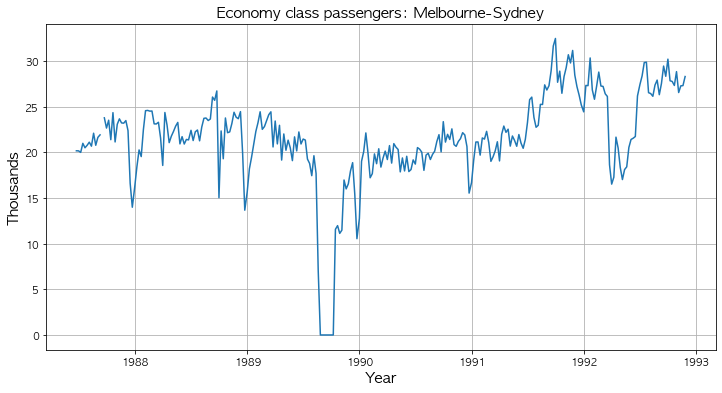

In [5]:
fig = plt.subplots(figsize=(12,6))

plt.plot(melsyd['Economy.Class'])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Thousands', fontsize=15)
plt.title('Economy class passengers: Melbourne-Sydney', fontsize=15)
plt.grid()

plt.show()

Graph 분석

- 1989년에는 파업 때문에 수송객이 없습니다.
- 몇몇 이코노미석을 비즈니스석으로 교체했던 시도 때문에, 1992년에는 수송량이 감소했습니다.
- 1991년 후반에는 수송객이 크게 증가했습니다.
- 휴가철 효과 때문에 매 연초에 일시적으로 크게 하락하는 몇몇 지점이 있습니다.
- 시계열의 수준(level)에 1987년에는 증가하고, 1989년에는 감소하고, 1990년부터 1991년에는 다시 증가하는 장기적인 요동(long-term fluctuation)이 있습니다.
- 몇몇 시점에는 관측값이 없습니다. 

In [6]:
a10 = pd.read_csv('../data/drug_sale.csv')
# pd.to_datetime(a10['index']).dt.month
a10['index'] = pd.to_datetime(a10['index'])

a10.set_index('index', inplace=True)

display(a10)
a10.info()

,value
index,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
value    204 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


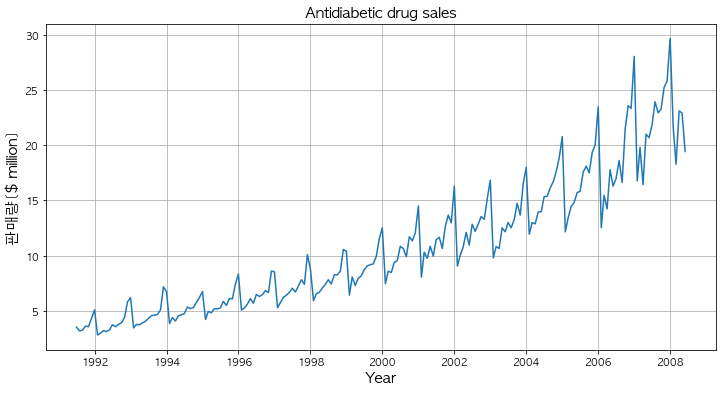

In [7]:
fig = plt.subplots(figsize=(12,6))

plt.plot(a10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('판매량[$ million]', fontsize=15)
plt.title('Antidiabetic drug sales', fontsize=15)
plt.grid()

plt.show()

## Sec. 2.3 Time series patterns

- Trend
- Seasonal
- Cyclic


 When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.


## Sec. 2.4 Seasonal plots


In [8]:
a10['year'] = pd.to_datetime(a10.index).year
a10['month'] = pd.to_datetime(a10.index).month

display(a10.head())

a10_pivot = pd.pivot_table(a10, values='value', index=['year','month'])
a10_pivot.head()

,value,year,month
index,,,
1991-07-01,3.526591,1991,7
1991-08-01,3.180891,1991,8
1991-09-01,3.252221,1991,9
1991-10-01,3.611003,1991,10
1991-11-01,3.565869,1991,11


value
year month          
1991 7      3.526591
     8      3.180891
     9      3.252221
     10     3.611003
     11     3.565869

In [9]:
a10_pivot_month = pd.pivot_table(a10, values='value', index=['month','year'])
display(a10_pivot_month.head(30))

a10_dict_month = a10_pivot_month.groupby('month').apply(lambda a10_pivot_month: a10_pivot_month.xs(a10_pivot_month.name)['value'].to_dict()).to_dict()
a10_dict_month[8]

value
month year           
1     1992   5.088335
      1993   6.192068
      1994   6.731473
      1995   6.749484
      1996   8.329452
      1997   8.524471
      1998   8.798513
      1999  10.391416
      2000  12.511462
      2001  14.497581
      2002  16.300269
      2003  16.828350
      2004  18.003768
      2005  20.778723
      2006  23.486694
      2007  28.038383
      2008  29.665356
2     1992   2.814520
      1993   3.450857
      1994   3.841278
      1995   4.216067
      1996   5.069796
      1997   5.277918
      1998   5.918261
      1999   6.421535
      2000   7.457199
      2001   8.049275
      2002   9.053485
      2003   9.800215
      2004  11.938030

{1991: 3.180891,
 1992: 3.55877609,
 1993: 4.56218455,
 1994: 5.35060467,
 1995: 5.85527729,
 1996: 6.30056933,
 1997: 6.70491861,
 1998: 7.43189221,
 1999: 9.07096378,
 2000: 10.64375083,
 2001: 11.65923889,
 2002: 12.19649985,
 2003: 12.51727568,
 2004: 15.37076394,
 2005: 17.554701,
 2006: 18.612189,
 2007: 23.93020353}

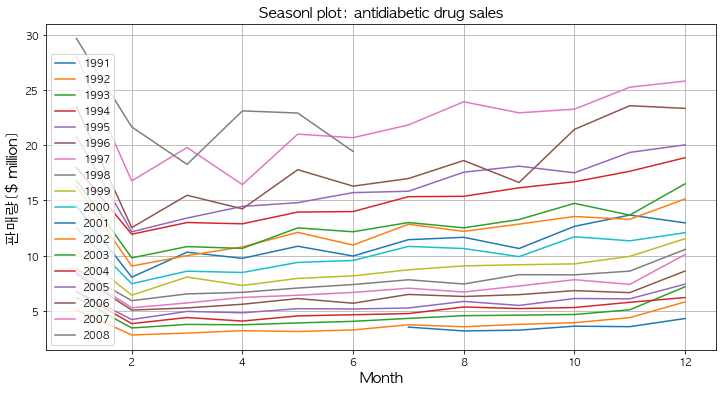

In [10]:
fig = plt.subplots(figsize=(12,6))
for year in a10_pivot.index.get_level_values(0).unique():
    plt.plot(a10_pivot.loc[year],label=year)
    
plt.xlabel('Month', fontsize=15)
plt.ylabel('판매량[$ million]', fontsize=15)
plt.title('Seasonl plot: antidiabetic drug sales', fontsize=15)
plt.grid()
plt.legend()

plt.show()

In [11]:
a10_dict = a10_pivot.groupby('year').apply(lambda a10_pivot: a10_pivot.xs(a10_pivot.name)['value'].to_dict()).to_dict()
a10_dict[1991]

{7: 3.5265910000000003,
 8: 3.180891,
 9: 3.252221,
 10: 3.6110029999999997,
 11: 3.565869,
 12: 4.3063709999999995}

In [12]:
a10['ang'] = [((m-1) / float(12) * 2 * pi)%360 for m in a10['month']]
color_dict = {1991:'tomato',
             1992:'orange',
             1993:'gold',
             1994:'greenyellow',
             1995:'limegreen', 
             1996:'forestgreen',
             1997:'teal',
             1998:'lightblue',
             1999:'royalblue',
             2000:'darkblue',
             2001:'slateblue',
             2002:'indigo',
             2003:'darkviolet',
             2004:'mediumvioletred',
             2005:'hotpink',
             2006:'pink',
             2007:'wheat',
             2008:'tan' 
             }
a10['color'] = [color_dict[m] for m in a10['year']]

In [13]:
a10

,value,year,month,ang,color
index,,,,,
1991-07-01,3.526591,1991,7,3.141593,tomato
1991-08-01,3.180891,1991,8,3.665191,tomato
1991-09-01,3.252221,1991,9,4.188790,tomato
1991-10-01,3.611003,1991,10,4.712389,tomato
1991-11-01,3.565869,1991,11,5.235988,tomato
...,...,...,...,...,...
2008-02-01,21.654285,2008,2,0.523599,tan
2008-03-01,18.264945,2008,3,1.047198,tan
2008-04-01,23.107677,2008,4,1.570796,tan


(0, 35)

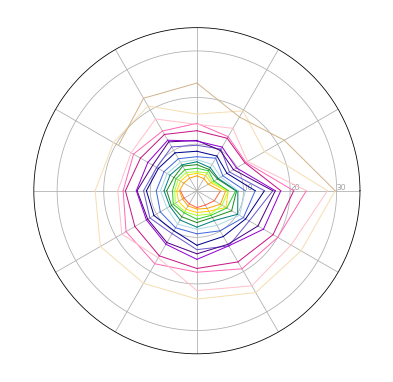

In [14]:
fig = plt.subplots(figsize=(12,6))
ax = plt.subplot(111, polar=True)
for i in range(len(a10['value'])-1):
    ax.plot(a10['ang'].iloc[i:i+2], a10['value'].iloc[i:i+2], linewidth=1, linestyle='solid', 
                    color=a10['color'].iloc[i]
           )

# Draw one axe per variable + add labels labels yet
categories = [str(m)+'월' for m in range(1,13)]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]

plt.xticks(angles, categories, color='w', size=15)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,35)


(0, 35)

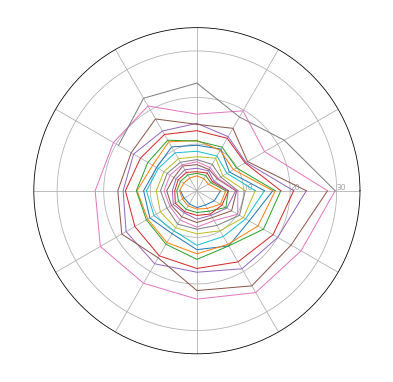

In [15]:
fig = plt.subplots(figsize=(12,6))
ax = plt.subplot(111, polar=True)
for y in range(1991,2009):
    idx = a10[a10['year']==y].index
    if y ==2008:
        ax.plot(a10['ang'].loc[idx[0]:], a10['value'].loc[idx[0]:], linewidth=1, linestyle='solid') 
    else:
        idx2 = a10[a10['year']==y+1].index
        ax.plot(a10['ang'].loc[idx[0]:idx2[0]], a10['value'].loc[idx[0]:idx2[0]], linewidth=1, linestyle='solid', 
#                     color=a10['color'].loc[idx[0]]
           )
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:12], categories, color='w', size=15)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,35)

## Sec. 2.5 Seasonal subseries plots


In [16]:
a10_dict_year = a10_pivot.groupby('year').apply(lambda a10_pivot: a10_pivot.xs(a10_pivot.name)['value'].to_dict()).to_dict()
a10_dict[1991]

{7: 3.5265910000000003,
 8: 3.180891,
 9: 3.252221,
 10: 3.6110029999999997,
 11: 3.565869,
 12: 4.3063709999999995}

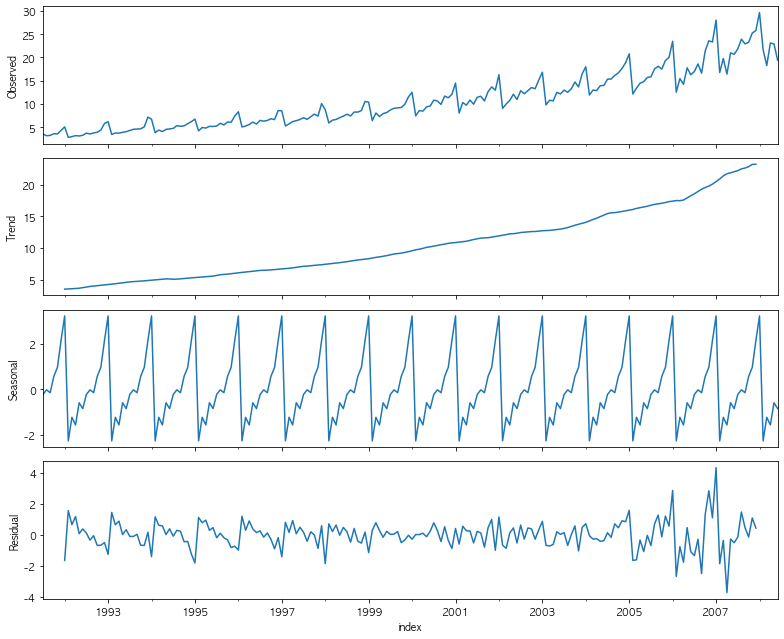

In [17]:
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(a10['value'], model='additive')
fig = decomposition.plot()
plt.show()